In [1]:
conda install -c conda-forge keras-preprocessing

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/sanju/miniconda3

  added / updated specs:
    - keras-preprocessing


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.4   |       hbcca054_0         151 KB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge
    openssl-3.3.1              |       h4ab18f5_1         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  ca-certificates                       2024.2.2-hbcca054_0 --> 2024.7.4-hbcca054_0 
  certifi                             2024.2.2-pyhd8ed1ab_0 --> 2024.7.4-pyhd8ed1ab_0 
  openssl                          

In [2]:



from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.layers import add
from tensorflow.keras.models import load_model
from pickle import load
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
import tensorflow as tf

2024-07-14 16:19:30.574585: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-14 16:19:30.757152: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-14 16:19:30.758378: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-14 16:19:31.964788: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2024-07-14 16:19:38.578242: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-14 16:19:38.579110: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 1s 763ms/step



start black dog is running through the grass end


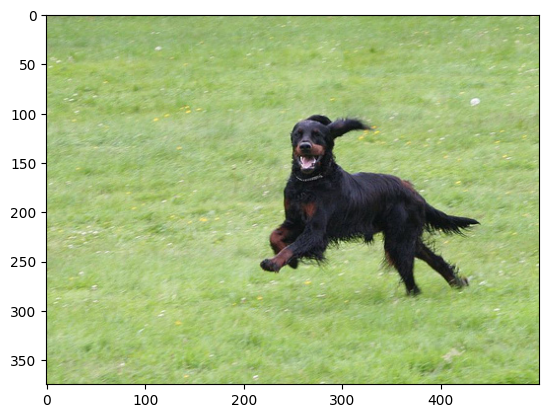

In [3]:

#ap = argparse.ArgumentParser()
#ap.add_argument('-i', '--image', required=True, help="Image Path")
#args = vars(ap.parse_args())
img_path = "/home/sanju/Documents/nlp/Project/Flicker8k_Dataset/232874193_c691df882d.jpg"
def extract_features(filename, model):
    try:
        image = Image.open(filename)
    except:
        print("ERROR: Couldn't open image! Make sure the image path and extension are correct")
    image = image.resize((299,299))
    image = np.array(image)
    # for images that have 4 channels, we convert them into 3 channels
    if image.shape[2] == 4: 
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image/127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

max_length = 32
tokenizer = load(open("/home/sanju/Documents/nlp/Project/tokenizer.p","rb"))
model = load_model('/home/sanju/Documents/nlp/Project/models_1/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)


In [4]:
# calcutation of BLEU score
from nltk.translate.bleu_score import sentence_bleu

def bleu_score(original, predicted):
    original = original.split()
    predicted = predicted.split()
    return sentence_bleu([original], predicted)

original = "black dog is running on green grass "
predicted = description
score = bleu_score(original, predicted)
print(f"BLEU Score: {score*100}")



BLEU Score: 31.55984539112945


In [5]:
# calcutation of BLEU score
from nltk.translate.bleu_score import sentence_bleu

def bleu_score(original, predicted):
    original = original.split()
    predicted = predicted.split()
    return sentence_bleu([original], predicted)

original = " black dog is running through the grass"
predicted = description
score = bleu_score(original, predicted)
print(f"BLEU Score: {score*100}")



BLEU Score: 72.59795291154771
